# PROJECT: USED CAR MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 1:**
1. DIỆP ĐẠI THIỆN NHÂN - 18120491
2. PHẠM MINH SỸ - 18120540

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `used_car_sales`. Tập dữ liệu này thu thập thông tin về các loại xe qua sử dụng đã được bán. Nó bao gồm các thuộc tính name, year, selling_price, km_driven, fuel, seller_type, transmission, ower. Tập dữ liệu được thu thập từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?fbclid=IwAR2RaMF8NWDYGPCl0sB9Y8HtpPx84xQDdDqlOPpypt0VzSNxRM_quWmlYGM) , license tại [đây](https://opendatacommons.org/licenses/dbcl/1-0/)
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng  

## Khám phá dữ liệu (đan xen tiền xử lý)

### Đọc dữ liệu 

In [2]:
df = pd.read_csv('used-car-sales.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Số dòng, số cột sẽ lần lượt lưu vào hai biến num_rows và num_cols

In [3]:
num_rows, num_cols = df.shape
print(f"Kich thuoc cua du lieu: {df.shape}")

Kich thuoc cua du lieu: (4340, 8)


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng cung cấp thông tin về  một loại xe đã qua sử dụng đã được bán đi, có vẻ như không có một dòng nào có ý nghĩa khác thường xuất hiện ở đây

### Dữ liệu có các dòng bị thiếu không?

In [4]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dữ liệu không có dòng nào bị thiếu

### Dữ liệu có các dòng bị lặp không?

In [5]:
print(f"So dong bi lap: {df.duplicated().sum()}")

So dong bi lap: 763


## Tiền xử lý

### Loại bỏ dòng dữ liệu bị lặp

In [6]:
df = df.drop_duplicates()
print(f"Kich thuoc cua data sau khi loai bo cac dong bi lap: {df.shape}")

Kich thuoc cua data sau khi loai bo cac dong bi lap: (3577, 8)


In [23]:
df.owner.value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

## Khám phá dữ liệu (tiếp tục)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu trên trang `Kaggle`
- name: Tên của chiếc xe
- year: Năm của chiếc xe khi được mua
- price: Giá của chiếc xe khi được bán lại (Đơn vị tính theo đô la)
- km_driven: Số km chiếc xe đã đi được
- fuel: Loại nhiên liệu chiếc xe sử dụng
    + Petrol
    + Diesel
    + CNG
    + LPG
    + Electric
- seller_type: Loại người bán
    + Individual
    + Dealer
    + Trustmark Dealer
- transmission: Hộ số truyền độ của động cơ
    + Manual
    + Automatic
- owner: Số đời chủ của loại xe khi được bán lại
    + First Owner
    + Second Owner
    + Third Owner
    + Fourth & Above Owner
    + Test Drive Car: Xe tập lái

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


Để biết được kiểu dữ liệu thật sự của các phần tử trong các cột `object`  này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu. Do đó tiền hành code hàm open_object_dtype trả về tập các kiểu dữ liệu có ở trong các cột

In [8]:
def open_object_dtype(s):
    dtypes = set(s.map(type))
    return dtypes

In [9]:
obj_cols = df.select_dtypes(["object"]).columns
data = obj_cols.map(lambda x: open_object_dtype(df[x]))
pd.Series(data=data, index = obj_cols)

name            {<class 'str'>}
fuel            {<class 'str'>}
seller_type     {<class 'str'>}
transmission    {<class 'str'>}
owner           {<class 'str'>}
dtype: object

### Với mỗi cột dữ liệu numeric, các giá trị được phân bố như thế nào?

Có tổng cột 3 cột có dữ liệu numeric, đó là `year`, `selling_price` và `km_driven`. 

Với mỗi cột numeric, ta sẽ tính tỉ lệ phần trăm giá trị bị thiếu (từ 0 đến 100), min và max. Kết quả được lưu vào dataframe `numeric_col_profiles_df`

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["year", "selling_price", "km_driven"]

def missing_ratio(s):
    return s.isnull().mean() * 100

numeric_col_profiles_df = df[nume_cols].agg([missing_ratio, 'min', 'max'])
numeric_col_profiles_df

,year,selling_price,km_driven
missing_ratio,0,0,0
min,"1,992","20,000",1
max,"2,020","8,900,000","806,599"


Nhìn qua thì dữ liệu không có gì bất thường. Chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không?

In [11]:
year_df = pd.DataFrame(df['year'].value_counts())
year_df.columns = ["Number of years"]
year_df.sort_index()

,Number of years
1992,1
1995,1
1996,2
1997,3
1998,9
1999,9
2000,12
2001,16
2002,18
2003,22


<BarContainer object of 27 artists>

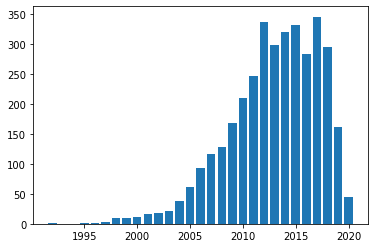

In [12]:
plt.bar(year_df.index, year_df['Number of years'])

Theo quan sát thì số lượng những chiếc xe cũ được bán rất ít và những chiếc xe có đời gần đây và không quá mới thì được ưu chuộng hơn

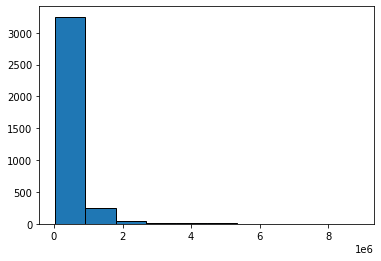

In [13]:
plt.hist(df['selling_price'], edgecolor='black');

In [14]:
len(df[df['selling_price'] > 3000000])

25

Theo quan sát, số lượng những chiếc xe đã qua sử dụng được bán lại có giá trị lớn hơn 3000000 đô la là rất ít. Ta cũng không thể khẳng định các giá trị này có phải là bất thường hay không, trên thực tế có những chiếc xe siêu đắt nên giá bán lại của chúng cũng không hề nhỏ là điều dễ hiểu. Do vậy, những giá trị này ta sẽ giữ lại và xem như chúng là những giá trị đặc biệt

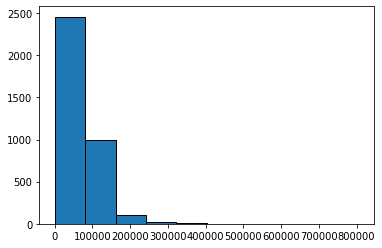

In [15]:
plt.hist(df['km_driven'], edgecolor='black');

In [16]:
len(df[df['km_driven'] > 200000])

53

Theo quan sát số lượng những chiếc xe được bán có số km đi được lớn hơn 200000 km cũng rất ít

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

In [22]:
cate_cols = ['fuel', 'seller_type', 'transmission', 'owner']
def num_diff_vals(series):
    return series.dropna().nunique()

def diff_vals(series):
    return series.dropna().unique()

cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,fuel,seller_type,transmission,owner
missing_ratio,0,0,0,0
num_diff_vals,5,3,2,5
diff_vals,"[Petrol, Diesel, CNG, LPG, Electric]","[Individual, Dealer, Trustmark Dealer]","[Manual, Automatic]","[First Owner, Second Owner, Fourth & Above Own..."


## Đặt câu hỏi

## Trả lời câu hỏi